<a href="https://colab.research.google.com/github/nestormontano/PrDS_2024__PredictingChurnForBankCustomers/blob/main/eda_py_grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 !pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.4/872.4 kB 40.0 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: pandas
    Foun

In [1]:
import numpy as np
import pandas as pd

In [2]:
import skimpy

## Premilinares
### Importacion

In [123]:
data= pd.read_csv('/content/Churn_Modelling.csv')

In [124]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Corregir datos

In [125]:
data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

0       no
1       si
2       no
3       si
4       no
        ..
9995    no
9996    no
9997    si
9998    no
9999    no
Length: 10000, dtype: object

In [126]:
data['HasCrCard']= data.apply( lambda x: 'si' if x['HasCrCard'] == 0 else 'no', axis=1)

In [127]:
data['IsActiveMember']= data.apply( lambda x: 'si' if x['IsActiveMember'] == 0 else 'no', axis=1)

In [128]:
del data['RowNumber']

In [129]:
data['CustomerId']= data['CustomerId'].to_string()

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB


In [ ]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ CreditScore        │   0 │     0 │     650 │     97 │  350 │    580 │     650 │     720 │     850 │  ▂▅▇▆▃ │  │
│ │ Age                │   0 │     0 │      39 │     10 │   18 │     32 │      37 │      44 │      92 │  ▃▇▃▁  │  │
│ │ Tenure             │   0 │     0 │       5 │    2.9 │    0 │      3 │       5 │       7 │      10 │ ▆▇▃▇▇▆ │  │
│ │ Balance            │   0 │     0 │   76000 │  62000 │    0 │      0 │   97000 │  130000 │  250000 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts      │   0 │     0 │     1.5 │   0.58 │    1 │      1 │       1 │       2 │       4 │  ▇ ▇   │  │
│ │ EstimatedSalary    │   0 │     0 │  100000 │  58000 │   12 │  51000 │  100000 │  150000 │  200000 │ ▇▇▇▇▇▇ │  │
│ │ Exited             │   0 │     0 │     0.2 │    0.4 │    0 │      0 │       0 │       0 │       1 │ ▇    ▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴────────┴──────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CustomerId                    │      0 │          0 │                       41000 │              411110000 │  │
│ │ Surname                       │      0 │          0 │                           1 │                  10055 │  │
│ │ Geography                     │      0 │          0 │                           1 │                  10000 │  │
│ │ Gender                        │      0 │          0 │                           1 │                  10000 │  │
│ │ HasCrCard                     │      0 │          0 │                           1 │                  10000 │  │
│ │ IsActiveMember                │      0 │          0 │                           1 │                  10000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# **EDA BiVariado** --- Grupo 3

In [ ]:
data.shape

(10000, 13)

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 13)


In [ ]:
data.count()

CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
print(data.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
data = data.dropna()
data.count()

CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [91]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


#**Detecting Outliers** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='CreditScore'>

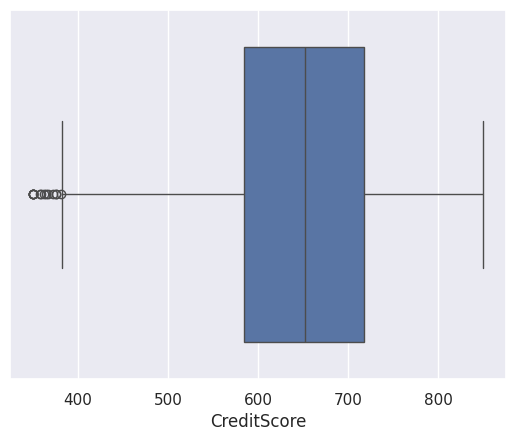

In [ ]:
sns.boxplot(x=data['CreditScore'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Age'>

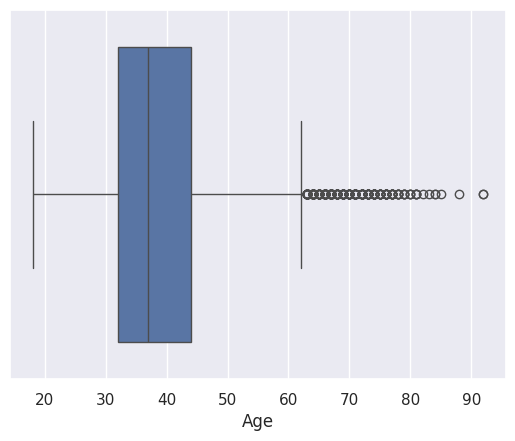

In [ ]:
sns.boxplot(x=data['Age'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='NumOfProducts'>

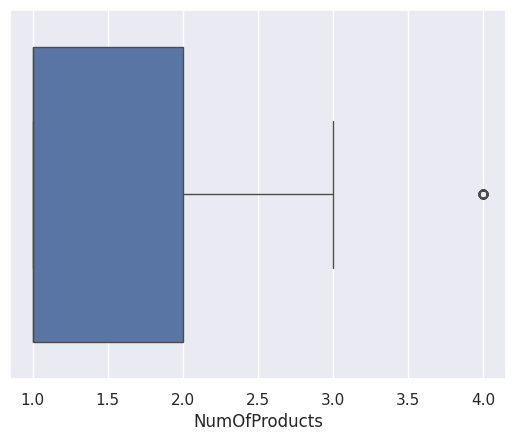

In [ ]:
sns.boxplot(x=data['NumOfProducts'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='EstimatedSalary'>

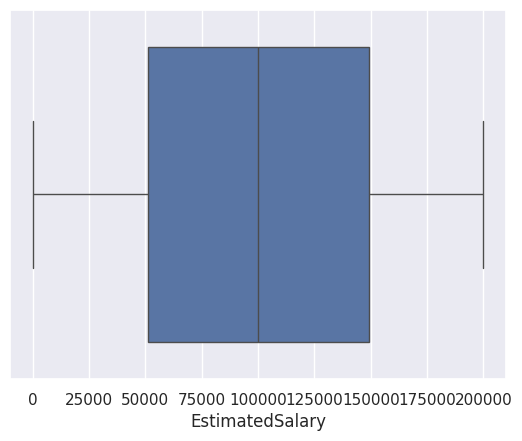

In [ ]:
sns.boxplot(x=data['EstimatedSalary'])

# **CreditScore** --- Grupo 3

In [92]:
import statistics as stats



In [93]:
from scipy import stats


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


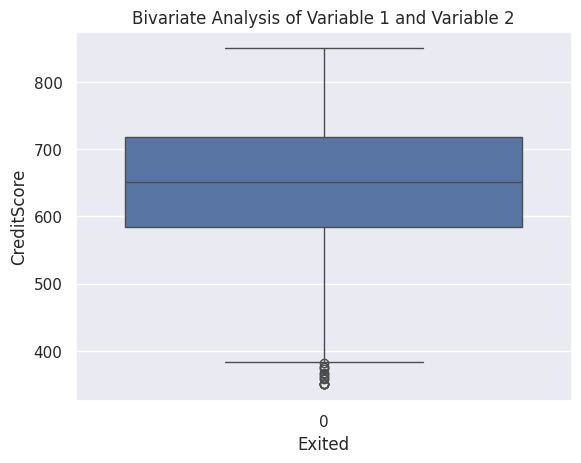

In [95]:
sns.boxplot(x='Exited', y='CreditScore', data=data) # boxplot, densidad
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show()

# **Age** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


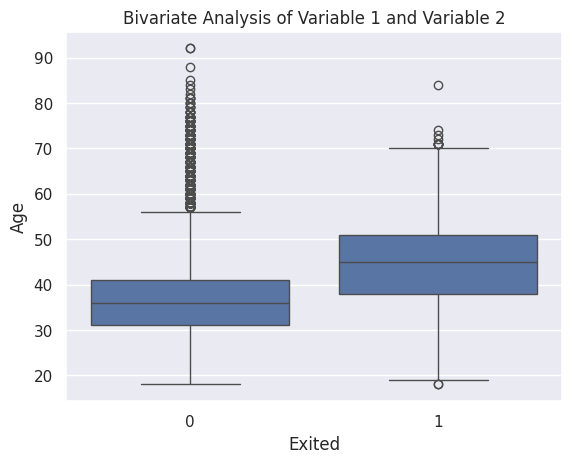

In [ ]:
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

# **NumOfProducts** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


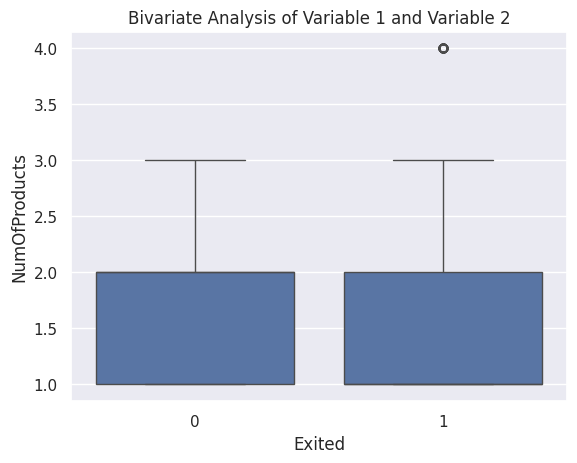

In [ ]:
sns.boxplot(x='Exited', y='NumOfProducts', data=data)
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.show()

# **Estimated Salary** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


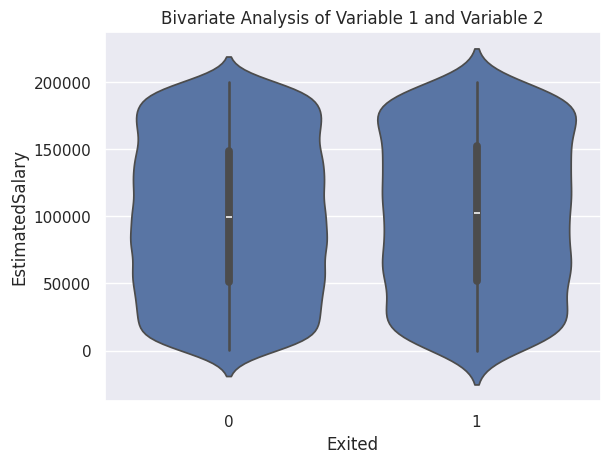

In [ ]:
sns.violinplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Bivariate Analysis of Variable 1 and Variable 2')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.show()

# **Matriz de Correlacion** --- Grupo 3

In [ ]:
datanew = data.drop(['CustomerId', 'Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], axis = 1)
datanew

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0
9996,516,35,10,57369.61,1,101699.77,0
9997,709,36,7,0.00,1,42085.58,1
9998,772,42,3,75075.31,2,92888.52,1


In [ ]:
matriz_corr = datanew.corr()
print (matriz_corr)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 EstimatedSalary    Exited  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000  


In [ ]:
kendall_matriz_corr = datanew.corr(method='kendall')
print(kendall_matriz_corr)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.005414  0.000791  0.004034       0.010118   
Age                -0.005414  1.000000 -0.007424  0.023611      -0.047761   
Tenure              0.000791 -0.007424  1.000000 -0.007016       0.010866   
Balance             0.004034  0.023611 -0.007016  1.000000      -0.266748   
NumOfProducts       0.010118 -0.047761  0.010866 -0.266748       1.000000   
EstimatedSalary     0.000807 -0.001571  0.005423  0.008200       0.010130   
Exited             -0.019049  0.268573 -0.011947  0.094983      -0.123434   

                 EstimatedSalary    Exited  
CreditScore             0.000807 -0.019049  
Age                    -0.001571  0.268573  
Tenure                  0.005423 -0.011947  
Balance                 0.008200  0.094983  
NumOfProducts           0.010130 -0.123434  
EstimatedSalary         1.000000  0.009864  
Exited                  0.009864  1.000000  


In [ ]:
spearnman_matriz_corr = datanew.corr(method='spearman')
print(spearnman_matriz_corr)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.007974  0.001133  0.005687       0.012568   
Age                -0.007974  1.000000 -0.010405  0.033304      -0.058566   
Tenure              0.001133 -0.010405  1.000000 -0.009513       0.012908   
Balance             0.005687  0.033304 -0.009513  1.000000      -0.316627   
NumOfProducts       0.012568 -0.058566  0.012908 -0.316627       1.000000   
EstimatedSalary     0.001237 -0.002431  0.007778  0.011778       0.012570   
Exited             -0.023289  0.323968 -0.013978  0.111110      -0.125282   

                 EstimatedSalary    Exited  
CreditScore             0.001237 -0.023289  
Age                    -0.002431  0.323968  
Tenure                  0.007778 -0.013978  
Balance                 0.011778  0.111110  
NumOfProducts           0.012570 -0.125282  
EstimatedSalary         1.000000  0.012081  
Exited                  0.012081  1.000000  


# **Seaborn Matriz** --- Grupo 3

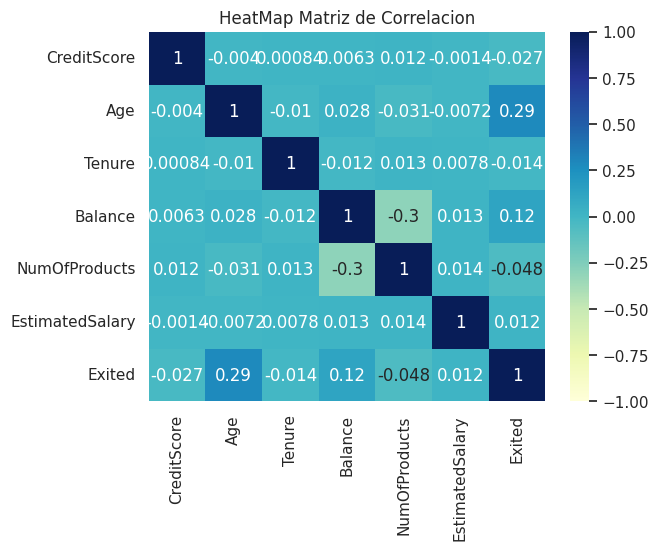

In [ ]:
sns.heatmap(matriz_corr, annot=True, cmap='YlGnBu', vmax = 1, vmin = -1)
plt.title('HeatMap Matriz de Correlacion')
plt.show()

# **3 Variable Graph CreditScore vs HasCard vs Exited** --- Grupo 3

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

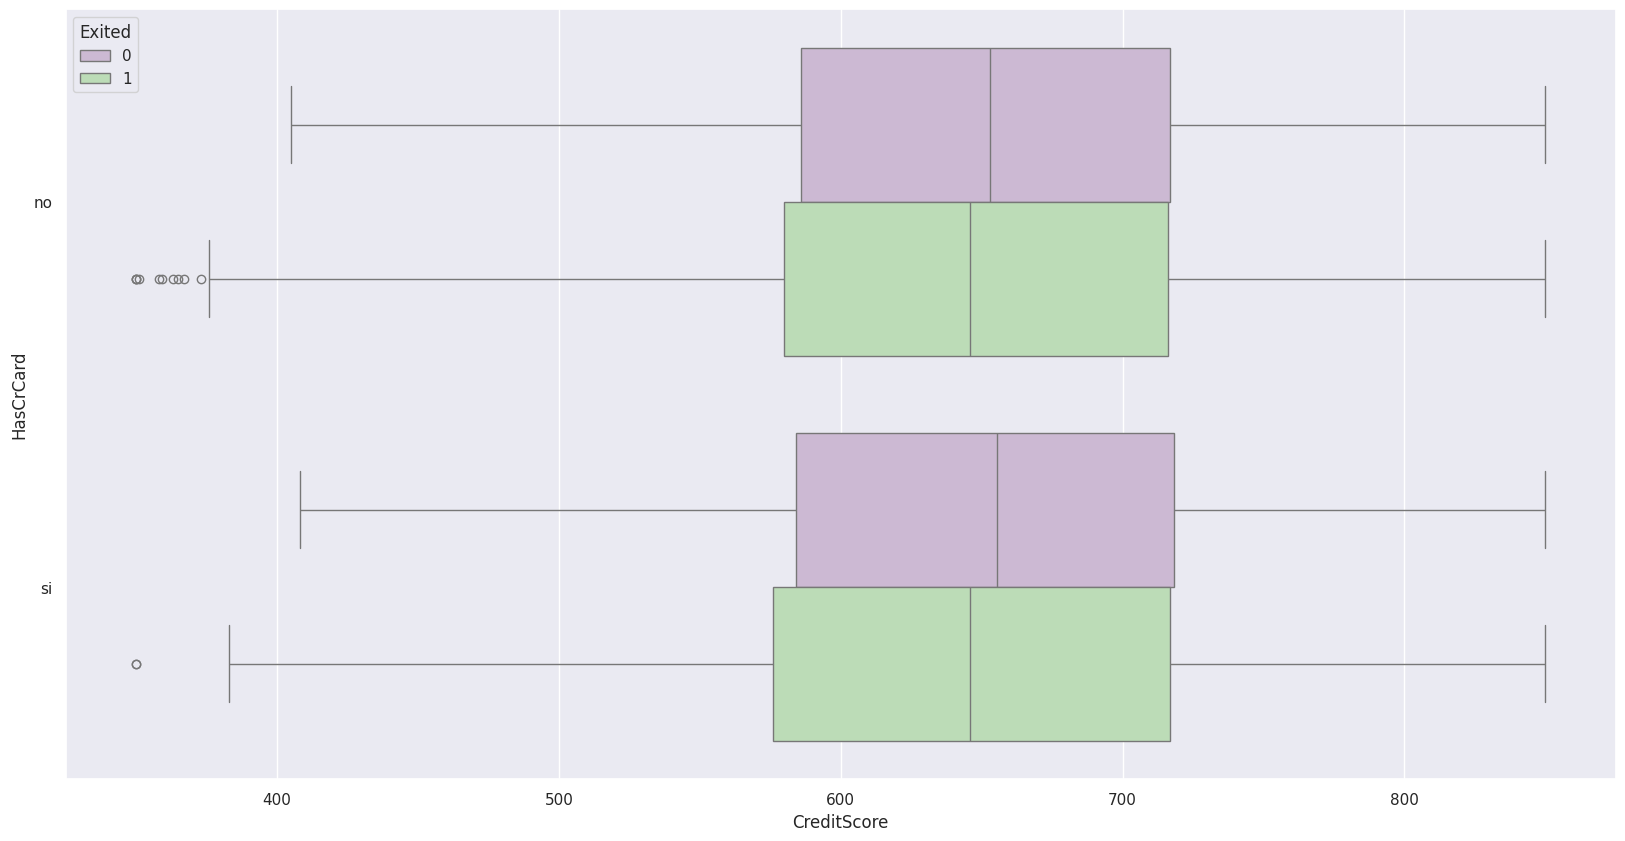

In [ ]:
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="CreditScore" , y="HasCrCard", hue="Exited",data=data,palette="PRGn",ax=ax)
plt.show()

#### Grupo 3 - Kevin Morales

In [18]:
## Para el ajuste del modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
## Para el preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
## Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Modelo
from sklearn.ensemble import RandomForestClassifier

### Modelamiento


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


In [101]:
data['Exited']= (data['Exited']== 'yes').astype('int')
# data['CustomerId']= (data['CustomerId']== 'yes').astype('int')

In [102]:
data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

### Train and Test

In [76]:
X_train, X_test, y_train, y_test= train_test_split(
data.drop(['Exited', 'CustomerId', 'Surname'], axis = 'columns'), ## Variables X
data['Exited'], ## Variable y
test_size=0.2, ## Tamaño para el test
random_state=42, ## Semilla para aleatorios
stratify= data['Exited'] ## Variable para estratificar
)

In [77]:
X_train.shape

(8000, 10)

In [78]:
X_test.shape

(2000, 10)

In [79]:
y_train.shape

(8000,)

In [80]:
y_test.shape

(2000,)

In [81]:
y_train.value_counts()

Exited
0    8000
Name: count, dtype: int64

### Preprocesamiento

In [82]:
categorical_columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

numerical_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [83]:
prep = ColumnTransformer([
('encoder', OneHotEncoder(), categorical_columns),
('scaler', StandardScaler(),numerical_columns)
], remainder= 'drop') ## 'drop' -> se elimina el resto de columnas
prep

ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 ['Geography', 'Gender', 'Tenure',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'Exited']),
                                ('scaler', StandardScaler(),
                                 ['CreditScore', 'Age', 'Balance',
                                  'EstimatedSalary'])])

### Entrenamiento y ajuste de Hiperparámetros

## Remuestreo

In [85]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

## Métricas

In [86]:
metricas = ['accuracy', 'balanced_accuracy', 'precision', 'recall']

### Especificacion del modelo - Pipeline

In [87]:
rf_pipe = Pipeline([('preproc', prep),
('rf', RandomForestClassifier(
criterion= 'gini',
class_weight= 'balanced', ## Balanceo
random_state=123) )
])

### Afinamiento de hiperparametros
## Malla de Búsqueda

In [88]:
rf_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'rf', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__verbose_feature_names_out', 'preproc__encoder', 'preproc__scaler', 'preproc__encoder__categories', 'preproc__encoder__drop', 'preproc__encoder__dtype', 'preproc__encoder__handle_unknown', 'preproc__encoder__max_categories', 'preproc__encoder__min_frequency', 'preproc__encoder__sparse', 'preproc__encoder__sparse_output', 'preproc__scaler__copy', 'preproc__scaler__with_mean', 'preproc__scaler__with_std', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__class_weight', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [89]:
prep.fit_transform(X_train).shape

ValueError: A given column is not a column of the dataframe

## Creamos la malla

In [45]:
rf_grid = dict(
## Complejidad dle costo
rf__ccp_alpha= [0.01, 0.001],
## Min de observaciones para ser cortado
rf__min_samples_split=[70, 110],
## Numero de arboles, es recomendable es usar 100~500/1000
rf__n_estimators= [200, 400, 700],
## Maximo de variables
rf__max_features= [5, 6] # En Python sí hacemos OHE
)

## Entrenamiento de Malla de Busqueda en la Crossvalidation

In [46]:
rf_tuned = GridSearchCV(rf_pipe, rf_grid, scoring= metricas,
refit= 'balanced_accuracy', cv=cv) #, n_jobs=-1)

In [47]:
rf_tuned.fit(X_train, y_train)

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Exited'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py", line 448, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'Exited'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 724, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 426, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py", line 456, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [48]:
res_cv= pd.DataFrame(rf_tuned.cv_results_)
res_cv.columns

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [51]:
cols= res_cv.columns[ res_cv.columns.str.startswith('param_rf')].to_list() + res_cv.columns[
res_cv.columns.str.startswith('mean_test') ].to_list()
res_cv_means= res_cv.loc[:, cols ].sort_values(by='mean_test_accuracy', ascending=False)
res_cv_means

NameError: name 'res_cv' is not defined

In [52]:
rf_tuned.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### Evaluacion del modelo 

##### TENGO UN ERROR   

# Modelo XGBoost

In [131]:
data.dtypes

CustomerId          object
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

In [133]:
data.nunique()

CustomerId            1
Surname            2932
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [134]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ CreditScore        │   0 │     0 │     650 │     97 │  350 │    580 │     650 │     720 │     850 │  ▂▅▇▆▃ │  │
│ │ Age                │   0 │     0 │      39 │     10 │   18 │     32 │      37 │      44 │      92 │  ▃▇▃▁  │  │
│ │ Tenure             │   0 │     0 │       5 │    2.9 │    0 │      3 │       5 │       7 │      10 │ ▆▇▃▇▇▆ │  │
│ │ Balance            │   0 │     0 │   76000 │  62000 │    0 │      0 │   97000 │  130000 │  250000 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts      │   0 │     0 │     1.5 │   0.58 │    1 │      1 │       1 │       2 │       4 │  ▇ ▇   │  │
│ │ EstimatedSalary    │   0 │     0 │  100000 │  58000 │   12 │  51000 │  100000 │  150000 │  200000 │ ▇▇▇▇▇▇ │  │
│ │ Exited             │   0 │     0 │     0.2 │    0.4 │    0 │      0 │       0 │       0 │       1 │ ▇    ▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴────────┴──────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CustomerId                    │      0 │          0 │                       41000 │              411110000 │  │
│ │ Surname                       │      0 │          0 │                           1 │                  10055 │  │
│ │ Geography                     │      0 │          0 │                           1 │                  10000 │  │
│ │ Gender                        │      0 │          0 │                           1 │                  10000 │  │
│ │ HasCrCard                     │      0 │          0 │                           1 │                  10000 │  │
│ │ IsActiveMember                │      0 │          0 │                           1 │                  10000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [143]:
# data['Exited']= (data['Exited']== 'yes').astype('int')
# data['Age']= (data['Age']== 'yes').astype('int')
data['HasCrCard']= (data['HasCrCard']== 'yes').astype('float')
data['IsActiveMember']= (data['IsActiveMember']== 'yes').astype('float')

In [144]:
data.dtypes

CustomerId          object
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [136]:
from sklearn.preprocessing import LabelEncoder

In [145]:
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [138]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0 15634602\n1 15647311\n2 15...,Hargrave,619,0,0,42,2,0.00,1,no,no,101348.88,1
1,0 15634602\n1 15647311\n2 15...,Hill,608,2,0,41,1,83807.86,1,si,no,112542.58,0
2,0 15634602\n1 15647311\n2 15...,Onio,502,0,0,42,8,159660.80,3,no,si,113931.57,1
3,0 15634602\n1 15647311\n2 15...,Boni,699,0,0,39,1,0.00,2,si,si,93826.63,0
4,0 15634602\n1 15647311\n2 15...,Mitchell,850,2,0,43,2,125510.82,1,no,no,79084.10,0


In [146]:
X = data.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y = data['Exited']

In [147]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoost Classifier


Accuracy: 0.8535
Precision: 0.6736111111111112
Recall: 0.49363867684478374
F1 score: 0.5697503671071953


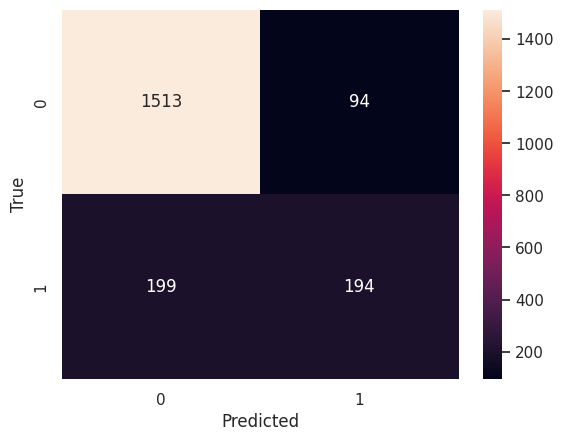

In [148]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# train the xgboost model
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

# predict the test data
y_pred_xgb = model_xgb.predict(X_test)

# display the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 score:", f1_score(y_test, y_pred_xgb))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

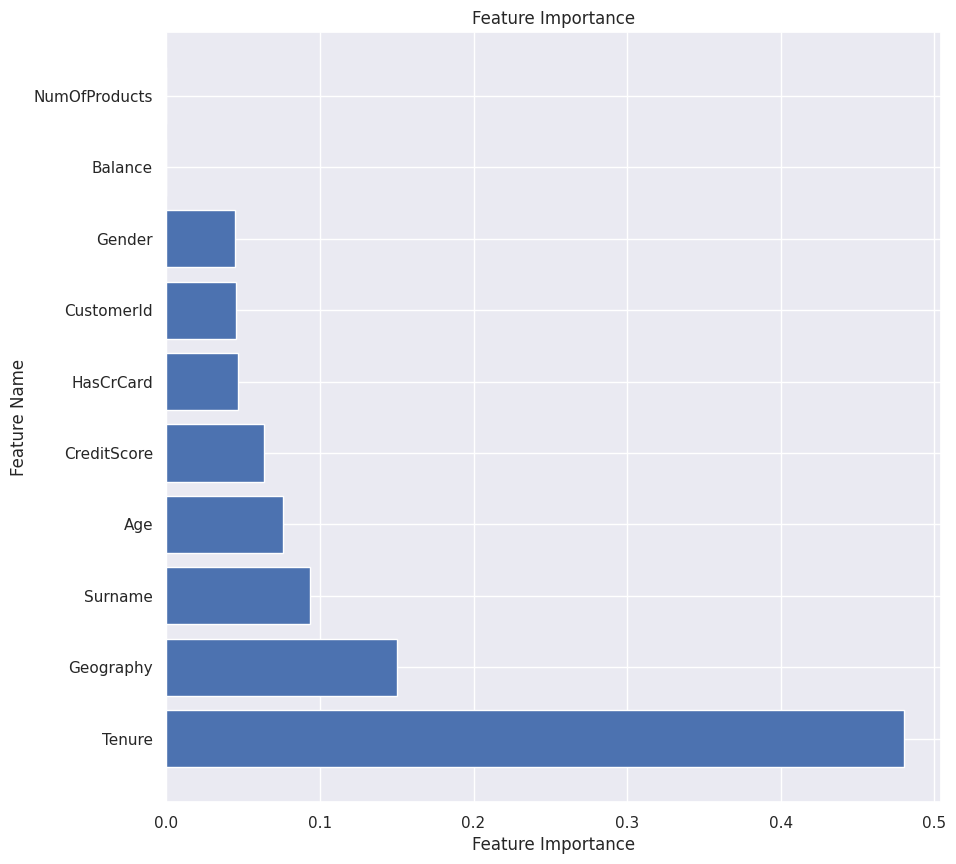

In [149]:
import matplotlib.pyplot as plt
feature_importances = model_xgb.feature_importances_
feature_names = data.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show();